<a href="https://colab.research.google.com/github/chrisfinan/IDS/blob/main/HW5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chris Finan

> 11/17/23

> Project 5

### Description


> In this notebook, I analyze a data set based on wine that has 3 columns: type, alcohol and sugar. I use naive bayes classifiers, probabilities, and contingency tables to discover information on how to predict whether a wine is red or white.



# **Problem 1 (Python)**

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Use the following data set: https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv

In [433]:
# Pandas read_csv from url

url = "https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv"

wineDF = pd.read_csv(url, sep=",")

In [434]:
# display the entire data frame

wineDF

,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


In [435]:
# display info about the dataframe
wineDF.describe()

,Type,Alcohol_flag,Sugar_flag
count,3345,3345,3345
unique,2,2,2
top,White,Low,Low
freq,2260,1684,1726


## 2. You will use the data set to demonstrate how we can use Naïve Bayes to classify a response variable. Specifically, we want to predict whether a wine is red or white based on whether the wine has high or low alcohol and sugar content.

- Type is the target, or y variable for this data set.

## 3. Test for presence any missing attribute/target values and impute as necessary.

In [436]:
#As you can see below, there are 0 null values in each column, so there is no need to impute
print(wineDF.isna().sum())

print(wineDF.isna())

Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64
       Type  Alcohol_flag  Sugar_flag
0     False         False       False
1     False         False       False
2     False         False       False
3     False         False       False
4     False         False       False
...     ...           ...         ...
3340  False         False       False
3341  False         False       False
3342  False         False       False
3343  False         False       False
3344  False         False       False

[3345 rows x 3 columns]


## 4. Encode all categoric attributes (e.g. label encoding or ordinal encoding, etc.)

In [437]:
#Encodes all of the attributes of the dataframe using 0 and 1 because there are only 2 values for each column

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_wineDF = pd.DataFrame()

# Encode only the categoric or boolean attributes
for i in range(0, wineDF.shape[1]):
    if wineDF.dtypes[i]=='object' or wineDF.dtypes[i]=='bool':
        encoded_wineDF[wineDF.columns[i]] = le.fit_transform(wineDF[wineDF.columns[i]])

print("-=========================")
print(wineDF)
print("-=========================")
encoded_wineDF

-=========================
       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
-=========================


,Type,Alcohol_flag,Sugar_flag
0,0,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,1
...,...,...,...
3340,1,0,0
3341,1,0,1
3342,1,0,1
3343,1,0,1


Red wine is listed as 0 <br>
White wine is listed as 1

High alcohol is listed as 0 <br>
Low alcohol is listed as 1

High sugar is listed as 0 <br>
Low sugar is listed as 1

## 5. Create contingency tables (cross tabulations) for:
>  a. Type vs. alcohol content

>  b. Type vs. sugar content

I decided to normalize the contingency tables by rows. They are normalized this way to show the ratios because the sample of reds and whites is imbalanced due to the fact that there are significantly more rows classified as white wine.

### Type vs. Alcohol content

> As you can see here, the high and low alcohol flag proportions are relatively close together. However, red wine has a higher percentage of being low in alcohol compared to white wine, which has more high alcohol values.



In [438]:
#Creates and prints the contingency table for type and alcohol
tvacTable = pd.crosstab(wineDF['Type'], wineDF['Alcohol_flag'], margins=False, normalize='index')
tvacTable

Alcohol_flag,High,Low
Type,,
Red,0.447005,0.552995
White,0.520354,0.479646


### Type vs. Sugar content

> The sugar percentages in red and white wine have a more substantial difference than the alcohol percentages. About 22% of the red wine in this data set is high in sugar compared to white wine, which comes in at 61%. Significantly more of the red wine samples are low in sugar (78%) compared to white being on the lower end with 39%.

In [439]:
#Creates and prints the contingency table for type and sugar
tvscTable = pd.crosstab(wineDF['Type'], wineDF['Sugar_flag'], margins=False, normalize='index')
tvscTable

Sugar_flag,High,Low
Type,,
Red,0.218433,0.781567
White,0.611504,0.388496


## 6. Plot the two cross tabulations obtained in Step 5.


### Type vs. Alcohol content

> Seeing the bar chart visualizes the prop table from above. You can see that the values for high and low alcohol are close together in terms of proportions. Low is higher for red and high is higher for white

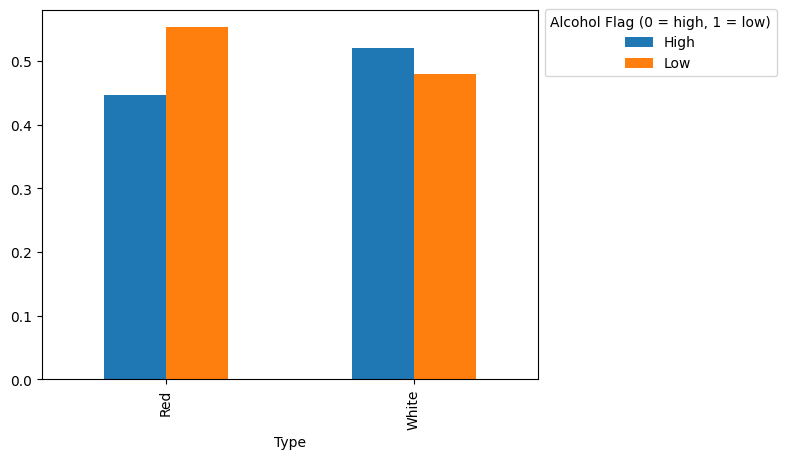

In [440]:
#Plot a bar chart based on the contingency table from above to further visualize the data
ax = tvacTable.plot(kind="bar", stacked=False)
ax.legend(title = "Alcohol Flag (0 = high, 1 = low)", bbox_to_anchor=(1, 1.02), loc='upper left')

### Type vs. Sugar content

> You can see here that red wine clearly has the highest value for low sugar and white wine leads in higher sugar. The difference between high and low, which is depicted well in the bar chart, is much higher for red wine and slightly less for white.

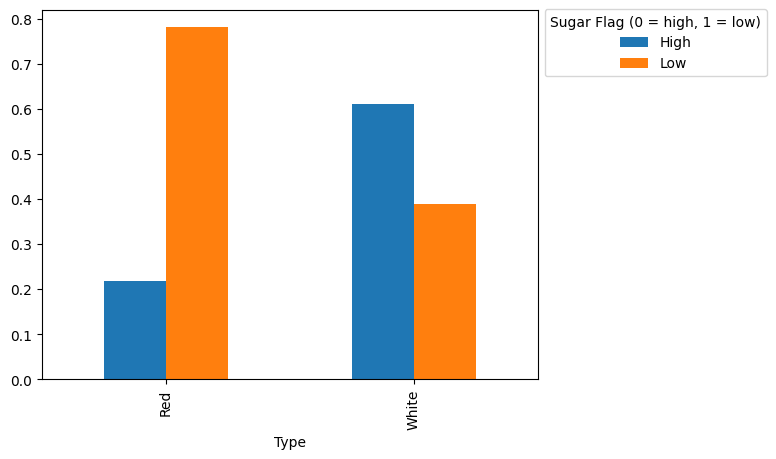

In [441]:
#Plot a bar chart based on the contingency table from above to further visualize the data
ax = tvscTable.plot(kind="bar", stacked=False)
ax.legend(title = "Sugar Flag (0 = high, 1 = low)", bbox_to_anchor=(1, 1.02), loc='upper left')

## 7. Use the tables from the previous step to calculate:

> a. The prior probability of Type = Red and Type = White.

> b. The probability of high and low alcohol content.

> c. The probability of high and low sugar content.

> d. The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).

> e. The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).

I made copies of the tables used from before and brought them down for easier viewing. I also decided to display the actual numbers rather than proportions this time to show more data and to calculate the probabilities

In [442]:
#Creates and prints the contingency table for type and alcohol
tvacTable2 = pd.crosstab(wineDF['Type'], wineDF['Alcohol_flag'], margins=False)
tvacTable2

Alcohol_flag,High,Low
Type,,
Red,485,600
White,1176,1084


In [443]:
#Creates and prints the contingency table for type and sugar
tvscTable2 = pd.crosstab(wineDF['Type'], wineDF['Sugar_flag'], margins=False)
tvscTable2

Sugar_flag,High,Low
Type,,
Red,237,848
White,1382,878


### The prior probability of Type = Red and Type = White.

> P(Red) = 1085/3345 -> .3243

> P(White) = 2260/3345 -> .6756

### The probability of high and low alcohol content.

> P(highAlc) = 1161/3345 -> .3471

> P(lowAlc) = 1684/3345 -> .5034

### The probability of high and low sugar content.

> P(highSug) = 1619/3345 -> .4840

> P(lowSug) = 1726/3345 -> .5160

### The conditional probabilities p(Alcohol_flag = High ∣ Type = Red) and p(Alcohol_flag = Low ∣ Type = Red).

> P(highAlc | Red) = P(highAlc ∩ Red) / P(Red)

> P(highAlc ∩ Red) = 485/3345 -> 0.1450

> P(Red) = 0.3243

> 0.1450 / 0.3243 = **0.4471 = P(highAlc | Red)**

<br>

> P(lowAlc | Red) = P(lowAlc ∩ Red) / P(Red)

> P(lowAlc ∩ Red) = 600/3345 -> 0.1794

> 0.1794 / 0.3243 = **0.5531 = P(lowAlc | Red)**


### The conditional probabilities p(Sugar_flag = High ∣ Type = Red) and p(Sugar_flag = Low ∣ Type = Red).

> P(highSug | Red) = P(highSug ∩ Red) / P(Red)

> P(highSug ∩ Red) = 237/3345 -> 0.0709

> P(Red) = 0.3243

> 0.0709 / 0.3243 = **.2185 = P(highSug | Red)**

<br>

> P(lowSug | Red) = P(lowSug ∩ Red) / P(Red)

> P(lowSug ∩ Red) = 848/3345 -> 0.2535

> 0.2535 / 0.3243 = **0.7817 = P(lowSug | Red)**

## 8. Create appropriate NB classifiers and record their accuracy on various training/test ratios, e.g., 80-20, 75-25, 70-30, 60-40, 50-50. Be sure to shuffle and stratify the data sets.


In [444]:
# Generating various Naive Bayes models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.model_selection import train_test_split

# Create a Gaussian NB Classifier. Note that each NB algorithm expects different types of data.
#   MultinomialNB → Applied to text data.
#   BernoulliNB → When you have binary features.
#   GaussianNB → When you have continuous features (more of a generic classifier)
#   CategoricalNB → When you have categorical data.

# All of the data in this dataframe is categorical
NBmodel = CategoricalNB()

# Train the model using training set for approach #2
# NBmodel.fit(features, labels)

# Prepare input and output for learning
# The target is the wine type
X = encoded_wineDF.iloc[:,1:]
y = encoded_wineDF.iloc[:,0]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
# 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.20, stratify=y)

# Display the sets
print(X_train)
print(X_test)

      Alcohol_flag  Sugar_flag
2688             0           1
1824             1           0
2483             0           0
935              1           1
2017             1           0
...            ...         ...
2650             0           1
2246             1           1
3001             0           1
11               1           1
2854             0           1

[2676 rows x 2 columns]
      Alcohol_flag  Sugar_flag
288              0           1
3047             0           1
2197             1           1
3132             0           0
682              1           0
...            ...         ...
864              0           1
2505             0           0
232              1           1
2467             0           0
2634             0           0

[669 rows x 2 columns]


In [445]:
# 50-50 split
X2_train, X2_test, y2_train, y2_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.50, stratify=y)

# Display the sets
print(X2_train)
print(X2_test)

      Alcohol_flag  Sugar_flag
1097             1           1
3003             0           0
1341             0           0
1685             1           0
708              0           0
...            ...         ...
1803             1           1
3297             0           0
1129             1           1
580              0           1
770              1           1

[1672 rows x 2 columns]
      Alcohol_flag  Sugar_flag
348              0           1
1435             0           0
1475             0           0
3212             0           0
1269             1           1
...            ...         ...
2899             0           1
2773             0           1
2584             0           0
1219             1           1
621              0           0

[1673 rows x 2 columns]


I decided to test the 80-20 and 50-50 splits. I used the CategoricalNB because all of the data in this set is categorical. The encoded data set reads as only 0s and 1s. Alcohol and sugar are printed because the first column (Type) is the target variable.

## 9. Plot the model accuracy measures obtained in Step 8.

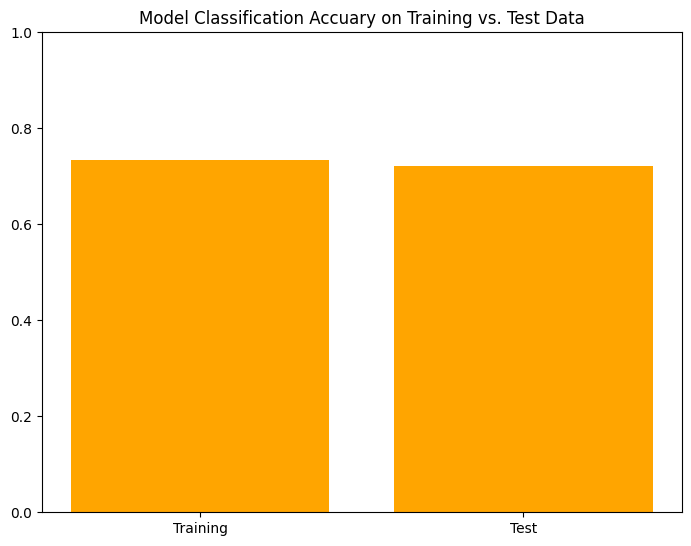

In [446]:
# Train the model
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

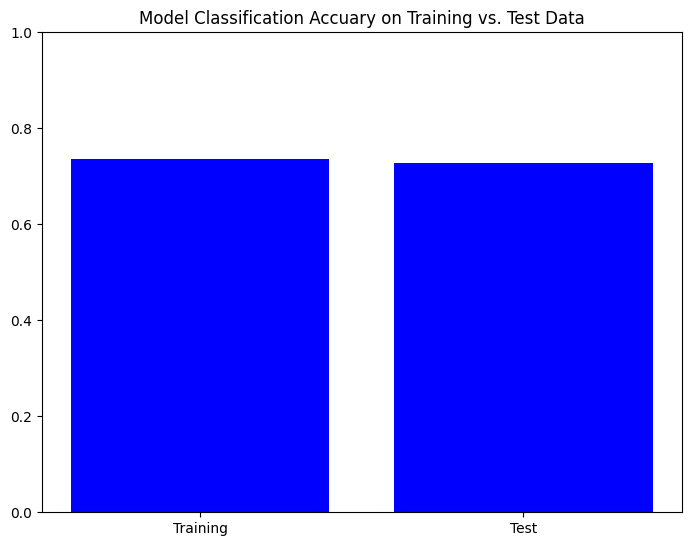

In [447]:
# Train the model
NBmodel.fit(X2_train, y2_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X2_train, y2_train), NBmodel.score(X2_test, y2_test)]

# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="blue")
ax.set_ylim(0, 1)
plt.show()

The training and test accuracy for both 80-20 and 50-50 look almost identical. I distinguished blue to be 50-50 and orange to be 80-20.

## 10. Summarize your findings
- In this data set, there are significantly more white wine samples than red.
- Red wine has a higher percentage of being low in alcohol compared to white wine, which has more high alcohol values.
- About 22% of the red wine in this data set is high in sugar compared to white wine, which comes in at 61%. Significantly more of the red wine samples are low in sugar (78%) compared to white being on the lower end with 39%.
- The probability of low alcohol is higher than high alcohol in this set.
- Low sugar is also more probable than high sugar in this data set.
- It is more proabable that red wine has low sugar or low alcohol than high of either
- For this data set, the type of wine is the target y variable. Therefore, it is compared against the other columns with the Naive Bayes classifiers.
- When testing different percent splits using the NB classifiers, I noticed there was barely any difference. 80-20 and 50-50 look very similar.
- I was doing some more testing and noticed a more noticeable drop when setting the testing data to 90%. However, that is not optimal, so I decided not to display it.
- I also tested Gaussian, but the results were very similar to categorical.
- The training and test accuracy both look to be around 70-75%.


## Resources
- https://github.com/bforoura/IDS/blob/main/naiive_bayes.ipynb